In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

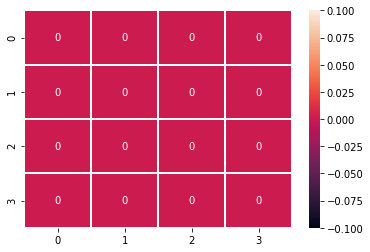

In [7]:
Value = np.zeros((4,4))
sns.heatmap(Value,annot=True,linewidth=2)

In [8]:
walls = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
#red = []
terminators = [(0,0)]

In [9]:
walls

((0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2))

In [10]:
terminators

[(0, 0)]

In [11]:
State_action = np.ones((16,4))*.25
State_action
#######  L     R     T     B

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [32]:
def Sweep(Value, Policy,terminators):
    New_Value = Value.copy()
    delta = 0
    x,y = Value.shape
    for i in range(x):  # x
        left = 0
        right = 0
        top = 0
        bottom = 0
        for j in range(y):  # y
            # (i,j)  
            if (i,j) in terminators:
                pass
            else:
                same= Value[i,j]
                if i==0:
                    left = same
                else:
                    left = Value[i-1,j]
                if i==x-1:
                    right= same
                else:
                    right = Value[i+1,j]
                if j==0:
                    top= same
                else:
                    top = Value[i,j-1]
                if j==y-1:
                    bottom= same
                else:
                    bottom = Value[i ,j+1]
                if (i,j) in walls:
                    transition_reward = -1 #-10  # setting award for wall
                else:
                    transition_reward = -1
                total_value = Policy[(y)*i+j,0]*(transition_reward+left) + Policy[(y)*i+j,1]*(transition_reward+right) + Policy[(y)*i+j,2]*(transition_reward+top) + Policy[(y)*i+j,3]*(transition_reward+bottom)
                #print(total_value, New_Value[i,j])
                delta = max(delta, np.abs(total_value- Value[i,j]))
                New_Value[i,j] = total_value 
    print(New_Value)
    print("_"*40)
    return New_Value, delta

In [33]:
def Improve_Policy(Value, Policy):
    New_Policy = Policy.copy()
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    x,y = Value.shape
    for i in range(x):
        for j in range(y):  # y
            # (i,j)  
            left = 0
            right = 0
            top = 0
            bottom = 0
            same= Value[i,j]
            if i==0:
                left = same
            else:
                left = Value[i-1,j]
            if i==x-1:
                right= same
            else:
                right = Value[i+1,j]
            if j==0:
                top= same
            else:
                top = Value[i,j-1]
            if j==y-1:
                bottom= same
            else:
                bottom = Value[i ,j+1]
            my_list = [left,right, top,bottom]
            max_val = max(my_list)
            my_list = np.array(my_list)
            my_list = (my_list==max_val).astype(int)
            my_list = my_list/np.sum(my_list)
            New_Policy[(y)*i+j,:] = my_list
    return New_Policy

In [34]:
call =0
def Evaluate_value(Value, Policy,theta,terminators):
    Policy = Policy.copy()
    theta = theta
    terminators = terminators.copy()
    Policy = Policy.copy()
    global call #no of times policy improved
    call += 1
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    delta = float(np.inf)
    while delta> theta:
        delta = 0
        Value, delta = Sweep(Value, Policy, terminators)
        #print(delta,theta, delta>theta)
    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    New_Policy = Improve_Policy(Value, Policy)
    print("Policy Improved")
    print("*"*40)
    if np.all(Policy==New_Policy):
        return Value, New_Policy, theta, terminators
    else:
        # repeat
        return Evaluate_value(Value, New_Policy,theta, terminators)
        
        

In [39]:
l,m,th,tr =Evaluate_value(Value,State_action,.01, terminators)


[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
________________________________________
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -2.  ]]
________________________________________
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -3.    ]
 [-2.9375 -3.     -3.     -3.    ]
 [-3.     -3.     -3.     -3.    ]]
________________________________________
[[ 0.       -3.0625   -3.84375  -3.984375]
 [-3.0625   -3.71875  -3.953125 -4.      ]
 [-3.84375  -3.953125 -4.       -4.      ]
 [-3.984375 -4.       -4.       -4.      ]]
________________________________________
[[ 0.        -3.65625   -4.7109375 -4.953125 ]
 [-3.65625   -4.5078125 -4.890625  -4.984375 ]
 [-4.7109375 -4.890625  -4.9765625 -5.       ]
 [-4.953125  -4.984375  -5.        -5.       ]]
________________________________________
[[ 0.         -4.21875    -5.55273438 -5.90039062]
 [-4.21875    -5.2734375  -5.79492188 -5.95703125]
 [-5

In [ ]:
# .25*(reward + value)

In [36]:
call  # no of times policy updated

3

In [37]:
print(l) # values

[[ 0. -1. -2. -3.]
 [-1. -2. -3. -4.]
 [-2. -3. -4. -5.]
 [-3. -4. -5. -6.]]


In [30]:
print(m) # Policy
# L   R    T  B

[[0.5 0.  0.5 0. ]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [1.  0.  0.  0. ]]


<AxesSubplot:>

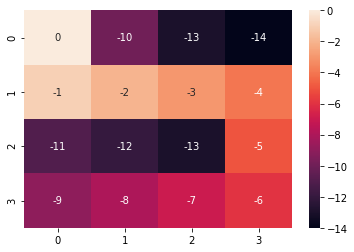

In [31]:
import seaborn as sns
sns.heatmap(l,annot=True)

<AxesSubplot:>

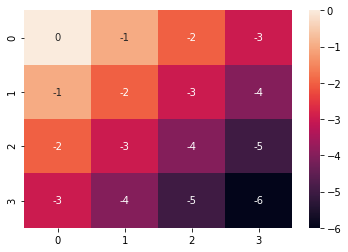

In [38]:
import seaborn as sns
sns.heatmap(l,annot=True)

# Make funtion[EXTRA]

In [15]:
def Sweep(Value, Policy,terminators):
    # create transition matrix globally that is possible since we will create dynamic wall
    New_Value = Value.copy()
    delta = 0
    x,y = Value.shape
    for i in range(x):  # x
        left = 0
        right = 0
        top = 0
        bottom = 0
        for j in range(y):  # y
            # (i,j)  
            if (i,j) in terminators:
                pass
            else:
                same= Value[i,j]
                if i==0:
                    left = same
                else:
                    left = Value[i-1,j]
                if i==x-1:
                    right= same
                else:
                    right = Value[i+1,j]
                if j==0:
                    top= same
                else:
                    top = Value[i,j-1]
                if j==y-1:
                    bottom= same
                else:
                    bottom = Value[i ,j+1]
#                 if (i,j) in red:
#                     transition_reward = -10
#                 else:
#                     transition_reward = -1
                transition_reward = transition_value[i,j]
                total_value = Policy[(y)*i+j,0]*(transition_reward+left) + Policy[(y)*i+j,1]*(transition_reward+right) + Policy[(y)*i+j,2]*(transition_reward+top) + Policy[(y)*i+j,3]*(transition_reward+bottom)
                #print(total_value, New_Value[i,j])
                delta = max(delta, np.abs(total_value- Value[i,j]))
                New_Value[i,j] = total_value      
    return New_Value, delta

In [16]:
def Improve_Policy(Value, Policy):
    New_Policy = Policy.copy()
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    x,y = Value.shape
    for i in range(x):
        for j in range(y):  # y
            # (i,j)  
            left = 0
            right = 0
            top = 0
            bottom = 0
            same= Value[i,j]
            if i==0:
                left = same
            else:
                left = Value[i-1,j]
            if i==x-1:
                right= same
            else:
                right = Value[i+1,j]
            if j==0:
                top= same
            else:
                top = Value[i,j-1]
            if j==y-1:
                bottom= same
            else:
                bottom = Value[i ,j+1]
            my_list = [left,right, top,bottom]
            max_val = max(my_list)
            my_list = np.array(my_list)
            my_list = (my_list==max_val).astype(int)
            my_list = my_list/np.sum(my_list)
            New_Policy[(y)*i+j,:] = my_list
    return New_Policy

In [17]:
call =0
def Evaluate_value(Value, Policy,theta,terminators):
    Policy = Policy.copy()
    theta = theta
    terminators = terminators.copy()
    Policy = Policy.copy()
    global call
    call += 1
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    delta = float(np.inf)
    while delta> theta:
        delta = 0
        Value, delta = Sweep(Value, Policy, terminators)
        #print(delta,theta, delta>theta)
    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    New_Policy = Improve_Policy(Value, Policy)
    if np.all(Policy==New_Policy):
        return Value, New_Policy, theta, terminators
    else:
        # repeat
        return Evaluate_value(Value, New_Policy,theta, terminators)

In [18]:
def Calculate_optimal(Grid_shape,no_actions, terminators):
    x,y = Grid_shape.shape
    State_action = np.ones((x*y,no_actions))*(1/no_actions)  #######  L     R     T     B
    Value = np.zeros((x,y))
    theta = 0.001
    transition_value = 
    l,m,th,tr =Evaluate_value(Value,State_action,.01, terminators)
    

SyntaxError: invalid syntax (<ipython-input-18-6a45e8905abc>, line 6)